In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import src.lib.utility_classfier as uclf

In [12]:
data_path='data/benchmark/'

In [13]:
df = pd.read_csv(path.join(data_path,'data.csv'))
df.shape

(109490, 89)

In [14]:
np.std(df.AGE)

14.655147758200552

In [15]:
np.mean(df[df.Class==1].AGE)

57.19900244299674

In [16]:
np.mean(df[df.Class==0].AGE)

46.40742078542331

In [17]:
print('Intersect ratio %.2f, case %d, control %d'% (case_contro_ratio(df)[0],case_contro_ratio(df)[1], case_contro_ratio(df)[2]))

NameError: name 'case_contro_ratio' is not defined

In [18]:
y=df.Class.values
df.drop(['GRID','Class'], axis=1, inplace=True)
feature_list=df.iloc[:,:(df.shape[1])].columns.tolist()
# X=np.load(path.join(data_path,'phemed_binary_value/X.npy'))
X = df.iloc[:,:(df.shape[1])].values
# X=np.load(path.join(data_path,'phemed_binary_value/X.npy'))
X.shape

(109490, 87)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train num',X_train.shape[0])
print('X_test num',X_test.shape[0])


X_train num 87592
X_test num 21898


In [24]:
def case_contro_ratio(y):
    num_of_case = y[y==1].shape[0]
    num_of_control = y[y==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control
pos_ratio = case_contro_ratio(y_test)[1]/y_test.shape[0]

In [29]:
import xgboost as xgb
import src.lib.utility_classfier as uclf
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 100
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test)

bst = xgb.train(param, xgtrain, num_round)
# make prediction
preds = bst.predict(xgtest)
uclf.compute_roc(y_test,preds,'xgboost')

ModuleNotFoundError: No module named 'xgboost'

In [22]:
uclf.plot_prc(y_test,preds,pos_ratio)

NameError: name 'preds' is not defined

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.260625780466487
0.2574337189739478
Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.38      0.03      0.06      1945

    accuracy                           0.91     21898
   macro avg       0.64      0.51      0.50     21898
weighted avg       0.87      0.91      0.87     21898

Confusion_matrix
[[19855    98]
 [ 1886    59]]
done in 0.644023s
(1, 87)
1. feature DURATION_BF2007 (8.209879)
2. feature AGE (3.156889)
3. feature MAX_SYSTOLIC (1.638625)
4. feature MAX_DIASTOLIC (1.563471)
5. feature MAX_VALUE_Creat (1.188304)
6. feature MAX_VALUE_Chol (1.117130)
7. feature MAX_BMI (1.053836)
8. feature MEDIAN_VALUE_Chol (1.041293)
9. feature MIN_VALIE_Creat (1.027067)
10. feature MAX_VALUE_HDL-C (0.801876)
11. feature MAX_VALUE_LDL-C (0.787999)
12. feature MIN_VALIE_Chol (0.774523)
13. feature MEDIAN_VALUE_Creat (0.761975)
14. feature CNT_395 (0.720347)
15. feature CNT_425 (0.654248)
16

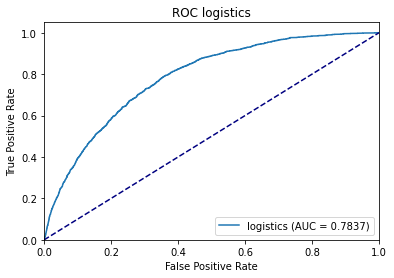

In [23]:
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train)
X_test_scaled = max_abs_scaler.transform(X_test)
y_score = uclf.logic_regression(X_train_scaled, y_train,X_test_scaled, y_test,10,feature_list,20)
uclf.compute_roc(y_test,y_score,'logistics')

Average precision-recall score: 0.25


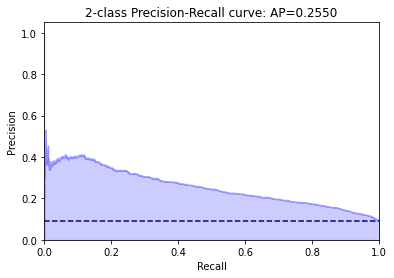

In [25]:
uclf.plot_prc(y_test,y_score,pos_ratio)

In [28]:
y_score = uclf.random_forest(X_train, y_train,X_test, y_test,feature_list,20)

Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19953
           1       0.43      0.00      0.00      1945

    accuracy                           0.91     21898
   macro avg       0.67      0.50      0.48     21898
weighted avg       0.87      0.91      0.87     21898

Confusion_matrix
[[19949     4]
 [ 1942     3]]
done in 22.370393s
1. feature DURATION_BF2007 (0.052488)
2. feature AGE (0.041924)
3. feature MIN_BMI (0.034148)
4. feature MEDIAN_BMI (0.033158)
5. feature MAX_BMI (0.032988)
6. feature MAX_SYSTOLIC (0.030347)
7. feature MEDIAN_SYSTOLIC (0.028284)
8. feature STD_BMI (0.027920)
9. feature MIN_SYSTOLIC (0.026855)
10. feature MAX_DIASTOLIC (0.025366)
11. feature MEDIAN_DIASTOLIC (0.025344)
12. feature MIN_DIASTOLIC (0.025052)
13. feature MAX_VALUE_Gluc (0.022671)
14. feature STD_SYSTOLIC (0.022185)
15. feature STD_DIASTOLIC (0.021699)
16. feature STD_VALUE_Gluc (0.021380)
17. feature MEDIAN_VALUE_G

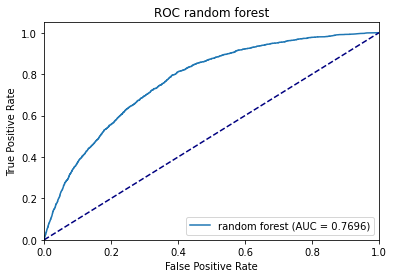

In [27]:
uclf.compute_roc(y_test,y_score,'random forest')

In [ ]:
uclf.plot_prc(y_test,y_score,pos_ratio)

In [ ]:
y_score = uclf.gradiant_boosting(X_train, y_train,X_test, y_test,feature_list,20)
uclf.compute_roc(y_test,y_score,'gradiant boosting')

In [ ]:
uclf.plot_prc(y_test,y_score,pos_ratio)

## feature selection by L1 

In [ ]:
#feature selection by L1 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)
X_test_new = model.transform(X_test)
print(X_test_new.shape)

## feature selection with Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)
X_test_new = model.transform(X_test)
print(X_test_new.shape)

In [ ]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
importances = clf.feature_importances_ 
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


In [ ]:
#logica regression with selected features
X_train_new_scaled = max_abs_scaler.fit_transform(X_train_new)
X_test_new_scaled = max_abs_scaler.transform(X_test_new)
y_score = uclf.logic_regression(X_train_new_scaled, y_train,X_test_new_scaled, y_test,10,feature_list,20)
uclf.compute_roc(y_test,y_score,'logistics')

## feature selection with lasso

In [ ]:
#feature selection by Lassocv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
clf = LassoCV(n_alphas=1000).fit(X_train, y_train)
model = SelectFromModel(clf,prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)
X_test_new = model.transform(X_test)
print(X_test_new.shape)
print(clf.coef_.argsort()[::-1][:20])

In [ ]:
np.sort(clf.coef_)[::-1][:20]

In [ ]:
#logica regression with selected features
X_train_new_scaled = max_abs_scaler.fit_transform(X_train_new)
X_test_new_scaled = max_abs_scaler.transform(X_test_new)
y_score = uclf.logic_regression(X_train_new_scaled, y_train,X_test_new_scaled, y_test,10,feature_list,10)
uclf.compute_roc(y_test,y_score,'logistics')